In [ ]:
# Mengimport beberapa library awal yang akan dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Membaca dataset dari file Excel
df = pd.read_excel('/content/drive/MyDrive/data/Tugas Akhir/Data Penjualan 2018-2022.xlsx', parse_dates=['TANGGAL'])

## **EKSPLORASI DATAFRAME**

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# Melihat 5 data teratas
df.head()

,NO.,TANGGAL,KODE,NAMA BARANG,JUMLAH,HARGA (Rp.),JUMLAH (Rp.)
0,1,2018-01-05,GR 10.10,miniatur kuda,4.0,20000.0,80000.0
1,2,2018-01-05,GR 10.14,miniatur pohon,12.0,20000.0,240000.0
2,3,2018-01-05,GR 10.21,miniatur mobil,4.0,20000.0,80000.0
3,4,2018-01-05,GR 10.22,miniatur perahu,4.0,20000.0,80000.0
4,5,2018-01-05,GR 10.24,miniatur pesawat,4.0,20000.0,80000.0


In [ ]:
# Melihat ukuran dataframe seperti jumlah baris data dan kolom
df.shape

(8179, 7)

In [ ]:
# Melihat informasi di dalam df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8179 entries, 0 to 8178
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   NO.           8179 non-null   int64         
 1   TANGGAL       8179 non-null   datetime64[ns]
 2   KODE          3622 non-null   object        
 3   NAMA BARANG   8179 non-null   object        
 4   JUMLAH        8160 non-null   float64       
 5   HARGA (Rp.)   8165 non-null   float64       
 6   JUMLAH (Rp.)  8157 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 447.4+ KB


In [ ]:
# Melihat jumlah nilai sekaligus data-data apa saja yang ada di dalam kolom "NO.", "TANGGAL", "KODE", "NAMA BARANG", "JUMLAH", "HARGA (Rp.)", dan kolom "JUMLAH (Rp.)"

print("--------------Jumlah Total Nilai Data Pada Kolom NO.--------------")
print(df["NO."].value_counts(), "\n")

print("--------------Jumlah Total Nilai Data Pada Kolom TANGGAL--------------")
print(df["TANGGAL"].value_counts(), "\n")

print("--------------Jumlah Total Nilai Data Pada Kolom KODE--------------")
print(df["KODE"].value_counts(), "\n")

print("--------------Jumlah Total Nilai Data Pada Kolom NAMA BARANG--------------")
print(df["NAMA BARANG"].value_counts())

print("--------------Jumlah Total Nilai Data Pada Kolom JUMLAH--------------")
print(df["JUMLAH"].value_counts())

print("--------------Jumlah Total Nilai Data Pada Kolom HARGA (Rp.)--------------")
print(df["HARGA (Rp.)"].value_counts())

print("--------------Jumlah Total Nilai Data Pada Kolom JUMLAH (Rp.)--------------")
print(df["JUMLAH (Rp.)"].value_counts())

--------------Jumlah Total Nilai Data Pada Kolom NO.--------------
1       1
5449    1
5462    1
5461    1
5460    1
       ..
2722    1
2721    1
2720    1
2719    1
8179    1
Name: NO., Length: 8179, dtype: int64 

--------------Jumlah Total Nilai Data Pada Kolom TANGGAL--------------
2020-04-20    203
2018-09-20    168
2019-11-14    168
2018-11-09    161
2021-02-09    143
             ... 
2021-02-23      1
2022-08-02      1
2022-08-10      1
2019-05-13      1
2020-07-20      1
Name: TANGGAL, Length: 416, dtype: int64 

--------------Jumlah Total Nilai Data Pada Kolom KODE--------------
GR 11.24      74
GR 08.09      66
GR 11.04      64
GR 11.56      63
GR 08.08      63
              ..
DKP – K.04     1
GR 07.14       1
GR 10.06       1
GR 10.73       1
GR1184         1
Name: KODE, Length: 380, dtype: int64 

--------------Jumlah Total Nilai Data Pada Kolom NAMA BARANG--------------
Kartu Gambar Hewan                         77
Kartu Gambar Buah                          71
Jam Natur

In [ ]:
# Memeriksa data apakah memiliki nilai kosong atau nilai NaN (Not a Number)
df.isnull().sum()

NO.                0
TANGGAL            0
KODE            4557
NAMA BARANG        0
JUMLAH            19
HARGA (Rp.)       14
JUMLAH (Rp.)      22
dtype: int64

In [ ]:
# Menunjukkan deskripsi pada data untuk fitur numerik (atau continous)
df.describe()

,NO.,JUMLAH,HARGA (Rp.),JUMLAH (Rp.)
count,8179.000000,8160.000000,8.165000e+03,8.157000e+03
mean,4090.000000,15.972672,2.453383e+05,2.159975e+06
std,2361.218259,47.087963,8.376470e+05,8.156961e+06
min,1.000000,1.000000,3.000000e+03,1.000000e+04
25%,2045.500000,1.000000,7.000000e+04,9.000000e+04
50%,4090.000000,1.000000,1.000000e+05,1.750000e+05
75%,6134.500000,4.000000,1.500000e+05,7.700000e+05
max,8179.000000,800.000000,3.500000e+07,2.300000e+08


In [ ]:
# Menunjukkan deskripsi pada data untuk fitur kategorik
df.describe(include="O")

,KODE,NAMA BARANG
count,3622,8179
unique,380,1702
top,GR 11.24,Kartu Gambar Hewan
freq,74,77


In [ ]:
# Melihat nilai korelasi data antar kolom yang bersifat numerik
df.corr()

<ipython-input-27-27158fc6bbdd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,NO.,JUMLAH,HARGA (Rp.),JUMLAH (Rp.)
NO.,1.000000,0.137812,0.073534,0.138187
JUMLAH,0.137812,1.000000,-0.044653,0.568531
HARGA (Rp.),0.073534,-0.044653,1.000000,0.152849
JUMLAH (Rp.),0.138187,0.568531,0.152849,1.000000


In [ ]:
# Melihat nilai korelasi data antar kolom yang bersifat numerik
df_2.corr()

<ipython-input-28-f1ba111e584a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_2.corr()


,total_barang,total_pendapatan,periode
total_barang,1.000000,0.891020,0.067393
total_pendapatan,0.891020,1.000000,0.134355
periode,0.067393,0.134355,1.000000


## **PREPROCESSING DATA**

In [ ]:
# Menghapus beberapa kolom yang tidak dibutuhkan seperti kolom "NO.", "KODE", "NAMA BARANG", dan kolom "HARGA (Rp.)"
df_1 = df.drop(['NO.','KODE', 'NAMA BARANG','HARGA (Rp.)'], axis=1, inplace=False)

In [ ]:
# Mengganti nama pada kolom "TANGGAL", 'JUMLAH' dan "JUMLAH (Rp.)"
df_1.rename(columns={'TANGGAL':'tanggal', 'JUMLAH':'total_barang', 'JUMLAH (Rp.)':'total_pendapatan'}, inplace=True)
df_1.head()

,tanggal,total_barang,total_pendapatan
0,2018-01-05,4.0,80000.0
1,2018-01-05,12.0,240000.0
2,2018-01-05,4.0,80000.0
3,2018-01-05,4.0,80000.0
4,2018-01-05,4.0,80000.0


In [ ]:
# Menghapus baris data yang memiliki nilai kosong atau nilai NaN (Not a Number) pada masing-masing kolom di dalam dataframe
df_1 = df_1.dropna(axis='rows')
df_1.isnull().sum()

tanggal             0
total_barang        0
total_pendapatan    0
dtype: int64

In [ ]:
# Melihat informasi di dalam df_1
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8157 entries, 0 to 8178
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tanggal           8157 non-null   datetime64[ns]
 1   total_barang      8157 non-null   float64       
 2   total_pendapatan  8157 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 254.9 KB


In [ ]:
# Menjumlahkan kolom "total_barang" dan kolom "total_pendapatan" kemudian meresample data menjadi perminggu
df_2 = df_1.set_index("tanggal").groupby("tanggal").sum()
df_2 = df_2.resample('W').agg({'total_barang': 'sum', 'total_pendapatan': 'sum'}).reset_index()

In [ ]:
# Menambahkan kolom "periode" sebagai representasi dari kolom "tanggal"
df_2['periode'] = range(1, len(df_2) + 1)
df_2.head()

,tanggal,total_barang,total_pendapatan,periode
0,2018-01-07,148.0,13750000.0,1
1,2018-01-14,749.0,93921000.0,2
2,2018-01-21,3175.0,440010000.0,3
3,2018-01-28,23.0,3034000.0,4
4,2018-02-04,203.0,41711000.0,5


In [ ]:
df_2.describe()

,total_barang,total_pendapatan,periode
count,261.000000,2.610000e+02,261.00000
mean,499.325670,6.750544e+07,131.00000
std,1067.332263,1.395408e+08,75.48841
min,0.000000,0.000000e+00,1.00000
25%,13.000000,1.815000e+06,66.00000
50%,91.000000,1.483100e+07,131.00000
75%,458.000000,5.442500e+07,196.00000
max,8004.000000,8.093300e+08,261.00000


In [ ]:
# Menghapus kolom "tanggal" karena diganti menjadi kolom "periode"
df_olah = df_2.drop(['tanggal'], axis=1, inplace=False)
df_olah = df_olah.set_index("periode")
df_olah.head()

,total_barang,total_pendapatan
periode,,
1,148.0,13750000.0
2,749.0,93921000.0
3,3175.0,440010000.0
4,23.0,3034000.0
5,203.0,41711000.0


## **Pra-Pemodelan**

In [ ]:
# Menentukan variabel X dan y
X = df_olah['total_barang'].values.reshape(-1, 1) # Kolom pertama merupakan variabel independen
y = df_olah['total_pendapatan'].values.reshape(-1, 1) # Kolom kedua merupakan variabel dependen

In [ ]:
# Normalisasi data menggunakan MinMaxScaler
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

In [ ]:
# Membagi dataset menjadi data latih dan data uji
# Data latih 70% data uji 30%
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, shuffle=False)

In [ ]:
# Membagi dataset menjadi data latih dan data uji
# Data latih 80% data uji 20%
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

In [ ]:
# Membagi dataset menjadi data latih dan data uji
# Data latih 90% data uji 10%
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.1, shuffle=False)

In [ ]:
# Melihat jumlah baris data dan kolom pada X_train, X_test, y_train, y_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(182, 1)
(182, 1)
(79, 1)
(79, 1)


In [ ]:
# # Menampilkan nilai X_train
# print("Nilai X_train:")
# print(X_train)

# # Menampilkan nilai X_test
# print("Nilai X_test:")
# print(X_test)

# # Menampilkan nilai y_train
# print("Nilai y_train:")
# print(y_train)

# # Menampilkan nilai y_test
# print("Nilai y_test:")
# print(y_test)

## **DATA VISUALISASI**

In [ ]:
# Mengambil 10 data dengan jumlah mainan terbanyak
top_10_data_mainan = df.groupby("NAMA BARANG")["JUMLAH"].sum().nlargest(10)

# Membuat data frame baru untuk 10 data teratas
df_top_10_mainan = pd.DataFrame({
    "NAMA BARANG": top_10_data_mainan.index,
    "JUMLAH": top_10_data_mainan.values
})

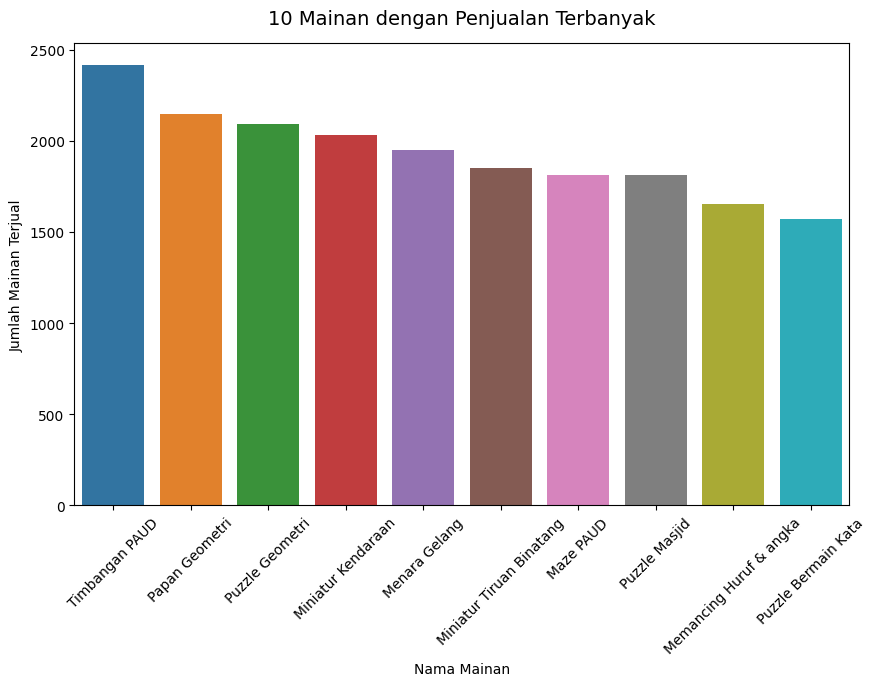

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="NAMA BARANG", y="JUMLAH", data=df_top_10_mainan)

plt.title("10 Mainan dengan Penjualan Terbanyak",
          fontsize=14, pad=14)
plt.xlabel("Nama Mainan")
plt.ylabel("Jumlah Mainan Terjual")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Mengambil 10 data dengan pendapatan penjualan mainan terbanyak
top_10_data_pendapatan = df.groupby("NAMA BARANG")["JUMLAH (Rp.)"].sum().nlargest(10)

# Membuat data frame baru untuk 10 data teratas
df_top_10_pendapatan = pd.DataFrame({
    "NAMA BARANG": top_10_data_pendapatan.index,
    "JUMLAH (Rp.)": top_10_data_pendapatan.values
})

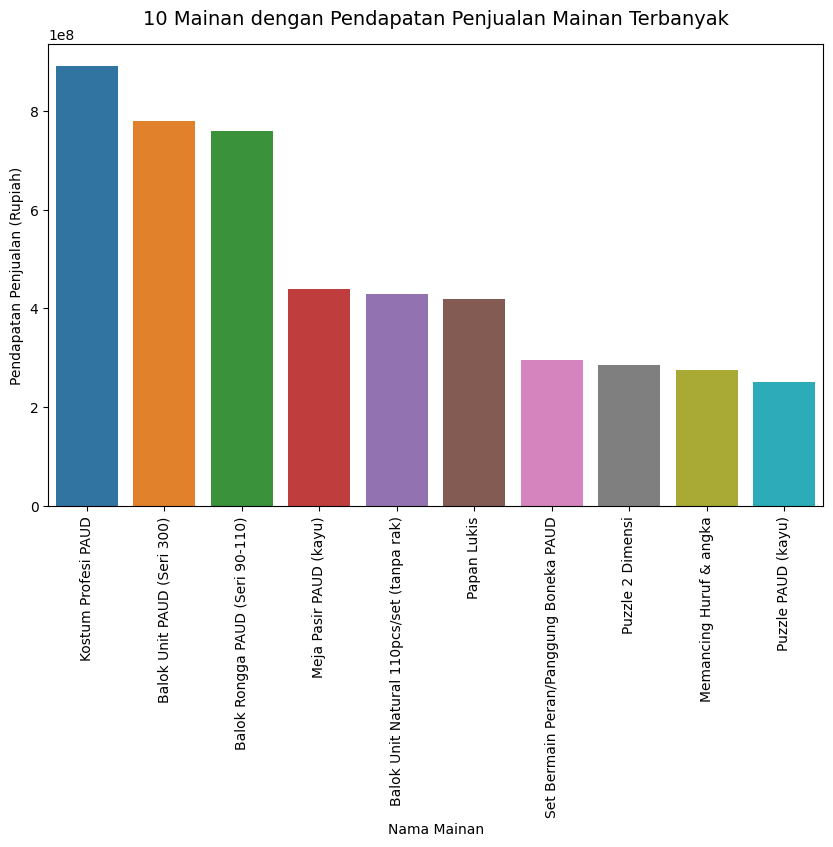

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="NAMA BARANG", y="JUMLAH (Rp.)", data=df_top_10_pendapatan)

plt.title("10 Mainan dengan Pendapatan Penjualan Mainan Terbanyak",
          fontsize=14, pad=14)
plt.xlabel("Nama Mainan")
plt.ylabel("Pendapatan Penjualan (Rupiah)")
plt.xticks(rotation=90)
plt.show()

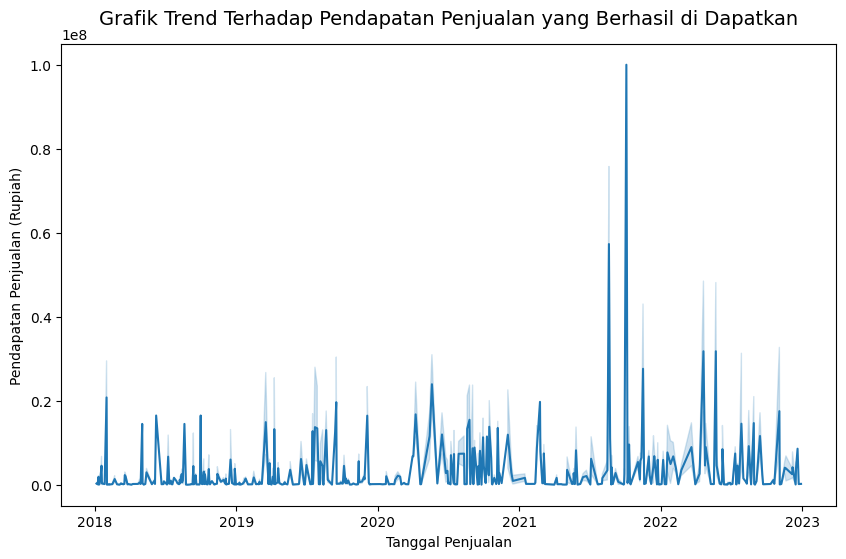

In [ ]:
plt.figure(figsize=(10, 6))

sns.lineplot(x="TANGGAL", y="JUMLAH (Rp.)", data=df)
plt.title("Grafik Trend Terhadap Pendapatan Penjualan yang Berhasil di Dapatkan",
          fontsize=14, pad=14)
plt.xlabel("Tanggal Penjualan")
plt.ylabel("Pendapatan Penjualan (Rupiah)")
plt.show()

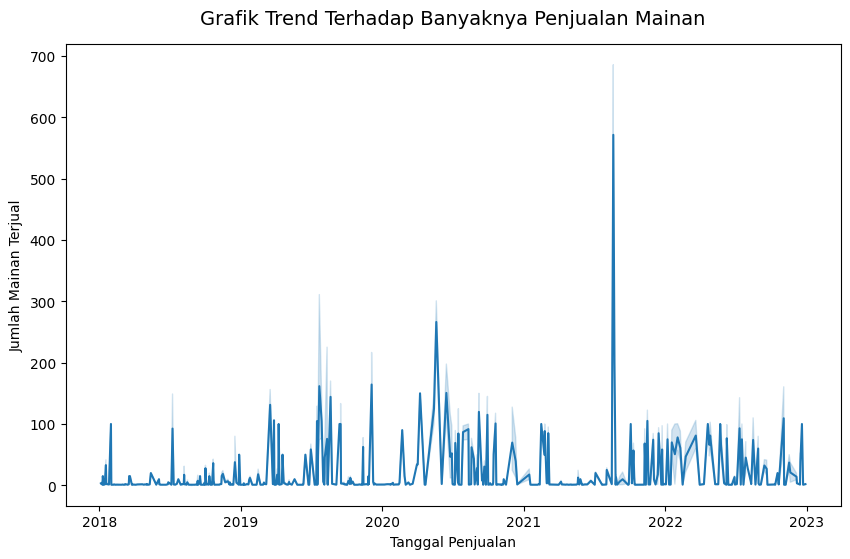

In [ ]:
plt.figure(figsize=(10, 6))

sns.lineplot(x="TANGGAL", y="JUMLAH", data=df)
plt.title("Grafik Trend Terhadap Banyaknya Penjualan Mainan",
          fontsize=14, pad=14)
plt.xlabel("Tanggal Penjualan")
plt.ylabel("Jumlah Mainan Terjual")
plt.show()

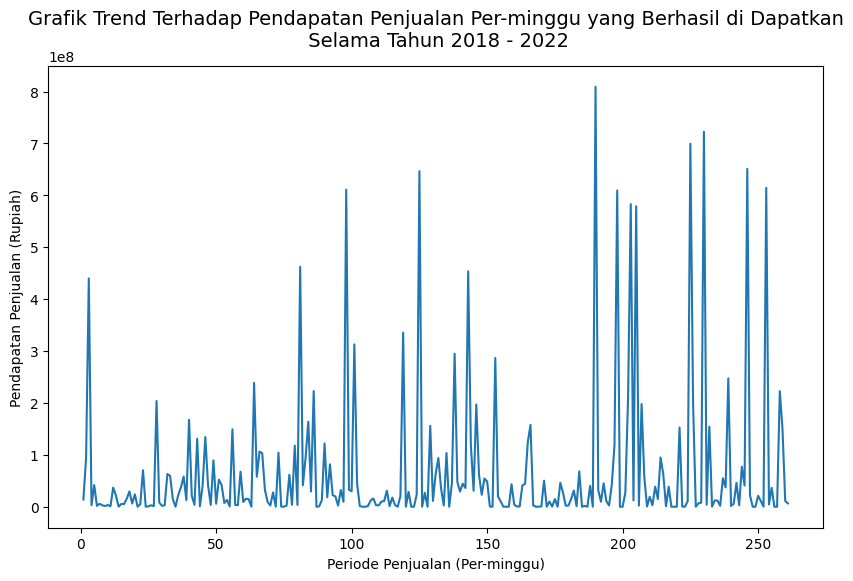

In [ ]:
plt.figure(figsize=(10, 6))

sns.lineplot(x="periode", y="total_pendapatan", data=df_olah)
plt.title("Grafik Trend Terhadap Pendapatan Penjualan Per-minggu yang Berhasil di Dapatkan\n Selama Tahun 2018 - 2022",
          fontsize=14, pad=14)
plt.xlabel("Periode Penjualan (Per-minggu)")
plt.ylabel("Pendapatan Penjualan (Rupiah)")
plt.show()

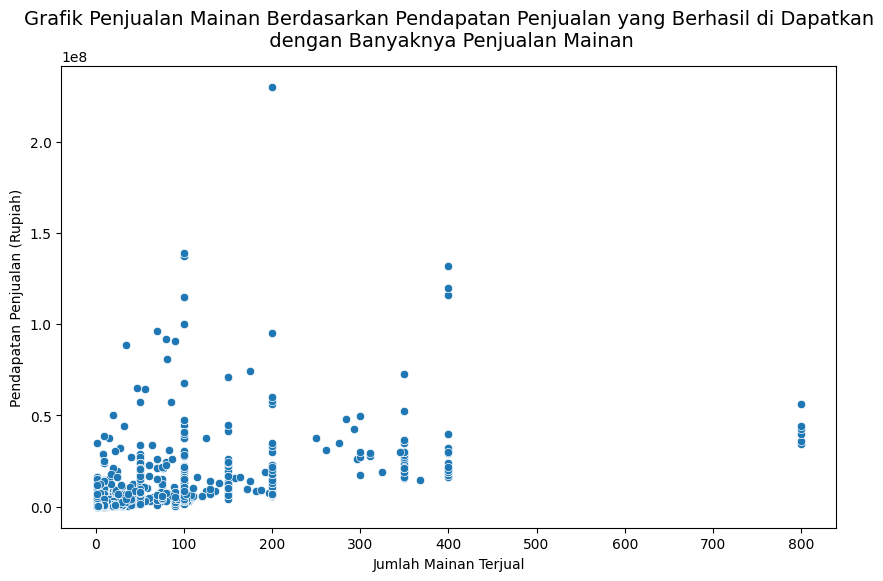

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x="JUMLAH", y="JUMLAH (Rp.)", data=df)
plt.title("Grafik Penjualan Mainan Berdasarkan Pendapatan Penjualan yang Berhasil di Dapatkan\n dengan Banyaknya Penjualan Mainan",
          fontsize=14, pad=14)
plt.xlabel("Jumlah Mainan Terjual")
plt.ylabel("Pendapatan Penjualan (Rupiah)")
plt.show()

<ipython-input-37-93d6e4182624>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="magma", annot=True)


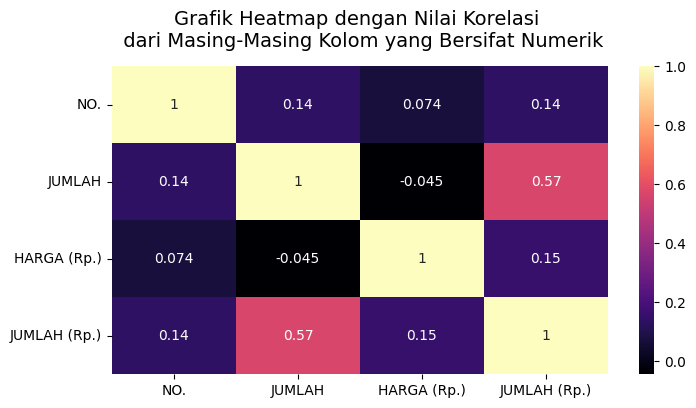

In [ ]:
plt.figure(figsize=(8, 4))

sns.heatmap(df.corr(), cmap="magma", annot=True)
plt.title("Grafik Heatmap dengan Nilai Korelasi \n dari Masing-Masing Kolom yang Bersifat Numerik",
          fontsize=14, pad=14)
plt.show()

<ipython-input-38-772242532b90>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_2.corr(), cmap="magma", annot=True)


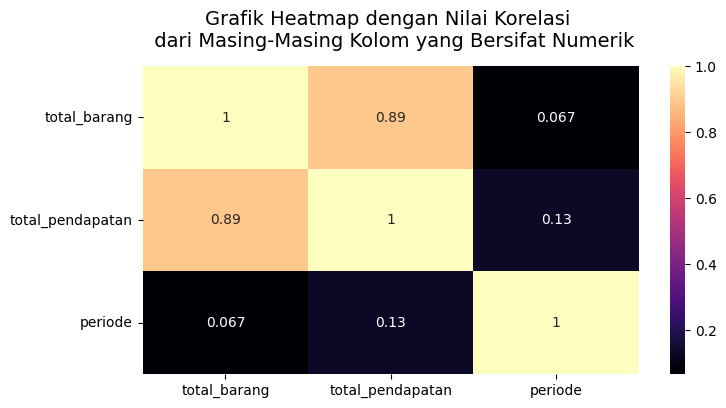

In [ ]:
plt.figure(figsize=(8, 4))

sns.heatmap(df_2.corr(), cmap="magma", annot=True)
plt.title("Grafik Heatmap dengan Nilai Korelasi \n dari Masing-Masing Kolom yang Bersifat Numerik",
          fontsize=14, pad=14)
plt.show()

## **Pembuatan Model**

## **Linear Regression**

In [ ]:
# Membuat model linear regression
LR_algorithm = LinearRegression()

# Menentukan parameter
parameters_LR = {
    "positive": [True, False],
    "fit_intercept": [True, False],
    "copy_X": [True, False],
    "n_jobs": [-1, 4, 3, 6, 5]
}

# Melatih model menggunakan data latih
grid_search_linear_reg = GridSearchCV(LR_algorithm, parameters_LR, verbose=1)
grid_search_linear_reg.fit(X_train, y_train)

# Melihat nilai terbaik dari parameter-parameter diatas berdasarkan algoritma regresi linear
print("Nilai Terbaik dari Parameter positive adalah: ",
      grid_search_linear_reg.best_estimator_.get_params()["positive"])
print("Nilai Terbaik dari Parameter fit_intercept adalah: ",
      grid_search_linear_reg.best_estimator_.get_params()["fit_intercept"])
print("Nilai Terbaik dari Parameter copy_X adalah: ",
      grid_search_linear_reg.best_estimator_.get_params()["copy_X"])
print("Nilai Terbaik dari Parameter n_jobs adalah: ",
      grid_search_linear_reg.best_estimator_.get_params()["n_jobs"])

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Nilai Terbaik dari Parameter positive adalah:  True
Nilai Terbaik dari Parameter fit_intercept adalah:  True
Nilai Terbaik dari Parameter copy_X adalah:  True
Nilai Terbaik dari Parameter n_jobs adalah:  -1


In [ ]:
# Memprediksi nilai y berdasarkan data uji
y_pred_test = grid_search_linear_reg.predict(X_test)

# Memprediksi nilai y berdasarkan data latih
y_pred_train = grid_search_linear_reg.predict(X_train)

In [ ]:
# Invers transform pada data y_test, y_train, y_pred_test dan y_pred_train
inv_y_test = scaler_y.inverse_transform(y_test)

inv_y_train = scaler_y.inverse_transform(y_train)

inv_y_pred_test = scaler_y.inverse_transform(y_pred_test)

inv_y_pred_train = scaler_y.inverse_transform(y_pred_train)

In [ ]:
# Membuat DataFrame dari nilai actual_y_test dan actual_y_pred_test
df_predictions = pd.DataFrame({'Actual y Values': inv_y_test.flatten(),
                               'Linear Regression Predictions': inv_y_pred_test.flatten()})

# Menampilkan tabel hasil invers transform
df_predictions.head(20)

,Actual y Values,Linear Regression Predictions
0,986000.0,9.390509e+06
1,68134000.0,3.078049e+07
2,0.0,7.832986e+06
3,1523000.0,9.079005e+06
4,0.0,7.832986e+06
5,40204000.0,6.452682e+07
6,0.0,7.832986e+06
7,809330000.0,8.389272e+08
8,31880000.0,3.524539e+07
9,9680000.0,1.437458e+07


In [ ]:
# # Membuat file dari dataframe df_predictions

# df_predictions.to_csv("LRpredictions.csv")

In [ ]:
# Melihat hasil prediksi algoritma linear regression berdasarkan data uji dan juga data latih menggunakan parameter uji RMSE dan R2 Score

print("--------------Nilai RMSE dan R2 Score terhadap Data Uji--------------")
# Menghitung R2 algoritma linear regression
r2_LR_test = r2_score(inv_y_test, inv_y_pred_test)
print("R2 Score Test Size: ", "%.6f" % r2_LR_test, "\n")
# Menghitung RMSE algoritma linear regression
rmse_LR_test = np.sqrt(mean_squared_error(inv_y_test, inv_y_pred_test))
print("RMSE Test Size: ", "%.6f" % rmse_LR_test, "\n")

print("-------------Nilai RMSE dan R2 Score terhadap Data Latih-------------")
# Menghitung R2 algoritma linear regression
r2_LR_train = r2_score(inv_y_train, inv_y_pred_train)
print("R2 Score Train Size: ", "%.6f" % r2_LR_train, "\n")
# Menghitung RMSE algoritma linear regression
rmse_LR_train = np.sqrt(mean_squared_error(inv_y_train, inv_y_pred_train))
print("RMSE Train Size: ", "%.6f" % rmse_LR_train, "\n")

--------------Nilai RMSE dan R2 Score terhadap Data Uji--------------
R2 Score Test Size:  0.704668 

RMSE Test Size:  107202872.369211 

-------------Nilai RMSE dan R2 Score terhadap Data Latih-------------
R2 Score Train Size:  0.893195 

RMSE Train Size:  33053224.531438 



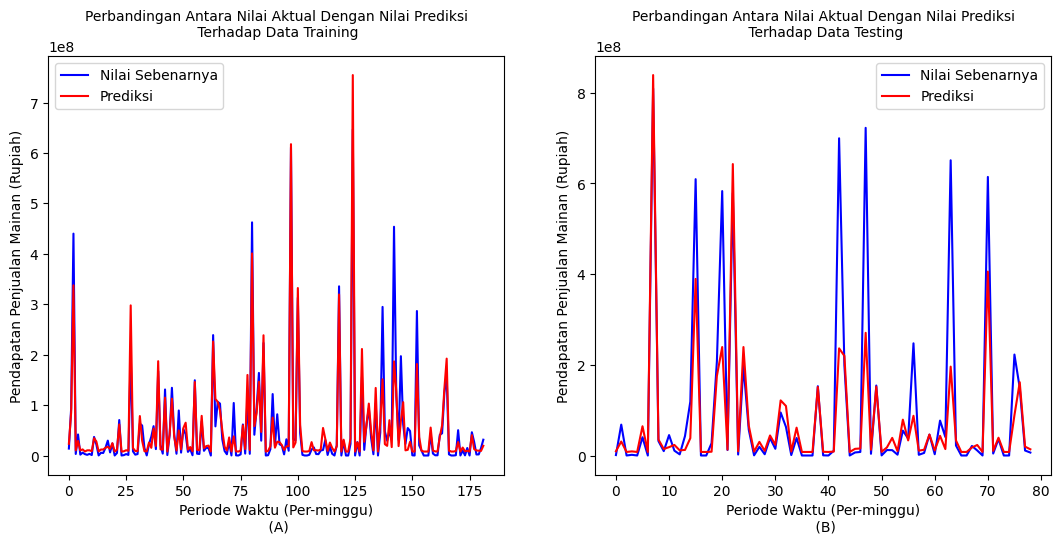

In [ ]:
# Melihat perbandingan antara nilai sebenarnya dengan nilai prediksi menggunakan algoritma linear regression
plt.figure(figsize=(20, 25))

plt.subplot(4, 3, 1)
plt.plot(inv_y_train, label='Nilai Sebenarnya', color='blue')
plt.plot(inv_y_pred_train, label='Prediksi', color='red')
plt.xlabel('Periode Waktu (Per-minggu)\n (A)')
plt.ylabel('Pendapatan Penjualan Mainan (Rupiah)')
plt.title('Perbandingan Antara Nilai Aktual Dengan Nilai Prediksi\n Terhadap Data Training', fontsize=10, pad=14)
plt.legend()

plt.subplot(4, 3, 2)
plt.plot(inv_y_test, label='Nilai Sebenarnya', color='blue')
plt.plot(inv_y_pred_test, label='Prediksi', color='red')
plt.xlabel('Periode Waktu (Per-minggu)\n (B)')
plt.ylabel('Pendapatan Penjualan Mainan (Rupiah)')
plt.title('Perbandingan Antara Nilai Aktual Dengan Nilai Prediksi\n Terhadap Data Testing', fontsize=10, pad=14)
plt.legend()

plt.show()

## **Support Vector Regression**

In [ ]:
# Membuat model support vector regression
SVR_algorithm = SVR()

# Menentukan parameter
parameters_SVR = {
    "C": [0.5, 1, 10, 100, 1000],
    "gamma": [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2],
    "epsilon": [0.001, 0.01, 0.1, 1, 2],
    "kernel": ["rbf", "poly", "sigmoid", "linear"]
    }

# Melatih model menggunakan data latih
grid_search_SVR = GridSearchCV(SVR_algorithm, parameters_SVR, n_jobs=-1, verbose=1)
grid_search_SVR.fit(X_train, y_train.ravel())

# Melihat nilai terbaik dari parameter-parameter diatas berdasarkan algoritma support vector regression
print("Nilai Terbaik dari Parameter C adalah: ",
      grid_search_SVR.best_estimator_.get_params()["C"])
print("Nilai Terbaik dari Parameter gamma adalah: ",
      grid_search_SVR.best_estimator_.get_params()["gamma"])
print("Nilai Terbaik dari Parameter epsilon adalah: ",
      grid_search_SVR.best_estimator_.get_params()["epsilon"])
print("Nilai Terbaik dari Parameter kernel adalah: ",
      grid_search_SVR.best_estimator_.get_params()["kernel"])

Fitting 5 folds for each of 1300 candidates, totalling 6500 fits
Nilai Terbaik dari Parameter C adalah:  1000
Nilai Terbaik dari Parameter gamma adalah:  0.7
Nilai Terbaik dari Parameter epsilon adalah:  0.01
Nilai Terbaik dari Parameter kernel adalah:  rbf


In [ ]:
# Memprediksi nilai y berdasarkan data uji
prediksi_test = grid_search_SVR.predict(X_test)

# Memprediksi nilai y berdasarkan data latih
prediksi_train = grid_search_SVR.predict(X_train)

In [ ]:
# Invers transform pada data y_test, y_train, prediksi_test dan prediksi_train
inv_y_test = scaler_y.inverse_transform(y_test)

inv_y_train = scaler_y.inverse_transform(y_train)

inv_prediksi_test = scaler_y.inverse_transform(prediksi_test.reshape(-1, 1))

inv_prediksi_train = scaler_y.inverse_transform(prediksi_train.reshape(-1, 1))

In [ ]:
# Membuat DataFrame dari nilai actual_X_test actual_y_test dan actual_prediksi_test
df_predictions = pd.DataFrame({'Actual y Values': inv_y_test.flatten(),
                               'Support Vector Regression Predictions': inv_prediksi_test.flatten()})

# Menampilkan tabel hasil invers transform
df_predictions.head(20)

,Actual y Values,Support Vector Regression Predictions
0,986000.0,9.274195e+06
1,68134000.0,2.891958e+07
2,0.0,7.851208e+06
3,1523000.0,8.989526e+06
4,0.0,7.851208e+06
5,40204000.0,6.041235e+07
6,0.0,7.851208e+06
7,809330000.0,6.251829e+08
8,31880000.0,3.304792e+07
9,9680000.0,1.383401e+07


In [ ]:
# # Membuat file dari dataframe df_predictions

# df_predictions.to_csv("SVRpredictions.csv")

In [ ]:
# Melihat hasil prediksi algoritma support vector regression berdasarkan data uji dan juga data latih menggunakan parameter uji RMSE dan R2 Score

print("--------------Nilai RMSE dan R2 Score terhadap Data Uji--------------")
# Menghitung R2 algoritma support vector regression
r2_SVR_test = r2_score(inv_y_test, inv_prediksi_test)
print("R2 Score Test Size: ", "%.6f" % r2_SVR_test, "\n")
# Menghitung RMSE algoritma support vector regression
rmse_SVR_test = np.sqrt(mean_squared_error(inv_y_test, inv_prediksi_test))
print("RMSE Test Size: ", "%.6f" % rmse_SVR_test, "\n")

print("-------------Nilai RMSE dan R2 Score terhadap Data Latih-------------")
# Menghitung R2 algoritma support vector regression
r2_SVR_train = r2_score(inv_y_train, inv_prediksi_train)
print("R2 Score Train Size: ", "%.6f" % r2_SVR_train, "\n")
# Menghitung RMSE algoritma support vector regression
rmse_SVR_train = np.sqrt(mean_squared_error(inv_y_train, inv_prediksi_train))
print("RMSE Train Size: ", "%.6f" % rmse_SVR_train, "\n")

--------------Nilai RMSE dan R2 Score terhadap Data Uji--------------
R2 Score Test Size:  0.697678 

RMSE Test Size:  108464125.127017 

-------------Nilai RMSE dan R2 Score terhadap Data Latih-------------
R2 Score Train Size:  0.898294 

RMSE Train Size:  32254515.986175 



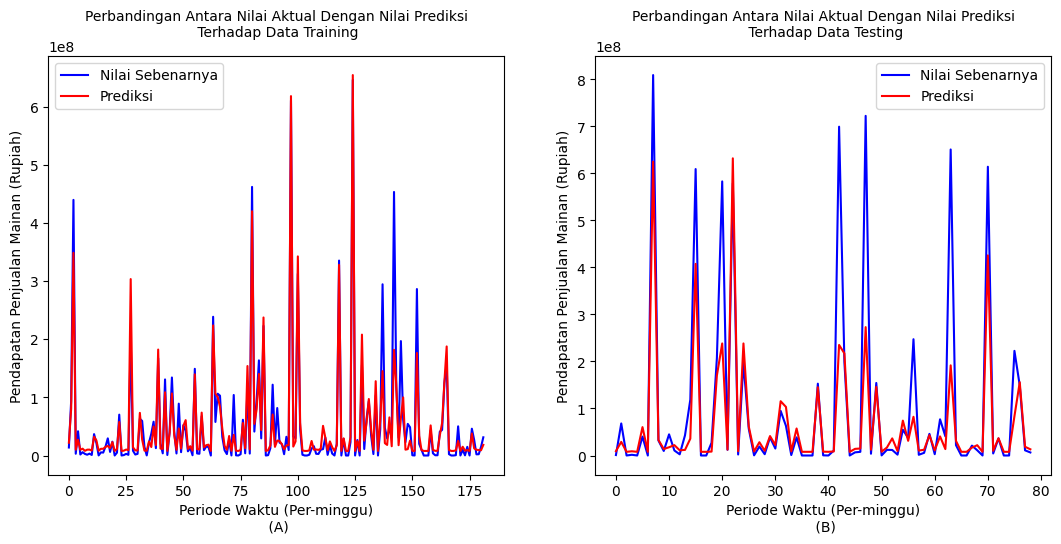

In [ ]:
# Melihat perbandingan antara nilai sebenarnya dengan nilai prediksi menggunakan algoritma support vector regression
plt.figure(figsize=(20, 25))

plt.subplot(4, 3, 1)
plt.plot(inv_y_train, label='Nilai Sebenarnya', color='blue')
plt.plot(inv_prediksi_train, label='Prediksi', color='red')
plt.xlabel('Periode Waktu (Per-minggu)\n (A)')
plt.ylabel('Pendapatan Penjualan Mainan (Rupiah)')
plt.title('Perbandingan Antara Nilai Aktual Dengan Nilai Prediksi\n Terhadap Data Training', fontsize=10, pad=14)
plt.legend()

plt.subplot(4, 3, 2)
plt.plot(inv_y_test, label='Nilai Sebenarnya', color='blue')
plt.plot(inv_prediksi_test, label='Prediksi', color='red')
plt.xlabel('Periode Waktu (Per-minggu)\n (B)')
plt.ylabel('Pendapatan Penjualan Mainan (Rupiah)')
plt.title('Perbandingan Antara Nilai Aktual Dengan Nilai Prediksi\n Terhadap Data Testing', fontsize=10, pad=14)
plt.legend()

plt.show()

## **Perbandingan Algoritma Linear Regression dan Support Vector Regression**

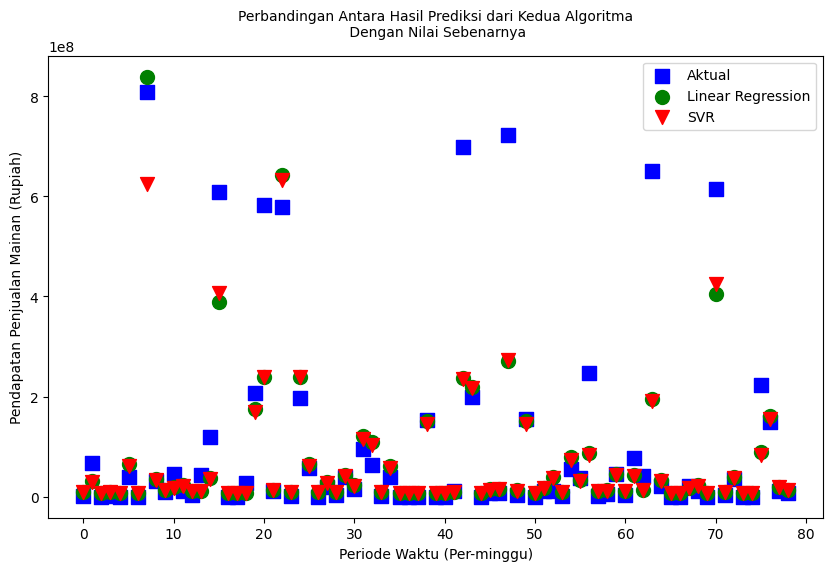

In [ ]:
# Perbandingan antara nilai sebenarnya dengan nilai prediksi pada kedua algoritma
plt.figure(figsize=(10, 6))
plt.scatter(range(len(X_test)), inv_y_test, color='blue', s=100, marker='s', label="Aktual")
plt.scatter(range(len(X_test)), inv_y_pred_test, color='green', s=100, marker='o', label="Linear Regression")
plt.scatter(range(len(X_test)), inv_prediksi_test, color='red', s=100, marker='v', label="SVR")
plt.xlabel("Periode Waktu (Per-minggu)")
plt.ylabel("Pendapatan Penjualan Mainan (Rupiah)")
plt.title('Perbandingan Antara Hasil Prediksi dari Kedua Algoritma\n Dengan Nilai Sebenarnya', fontsize=10, pad=14)

plt.legend()
plt.show()